## Carregar dados das ações

In [62]:
import yfinance as yf

In [63]:
ticker = input("Digite o código da ação: ")
dados = yf.Ticker(ticker).history("2y")
dados.head()

Digite o código da ação: PETR4.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-02 00:00:00-03:00,11.951576,12.266206,11.912247,12.178809,103985100,0.0,0.0
2021-06-04 00:00:00-03:00,12.261837,12.506550,12.200659,12.454111,102757300,0.0,0.0
2021-06-07 00:00:00-03:00,12.454110,12.475959,12.239986,12.362343,74548900,0.0,0.0
2021-06-08 00:00:00-03:00,12.309904,12.585205,12.218136,12.524027,88398600,0.0,0.0
2021-06-09 00:00:00-03:00,12.550246,12.707561,12.462849,12.524027,60724200,0.0,0.0


<Axes: xlabel='Date'>

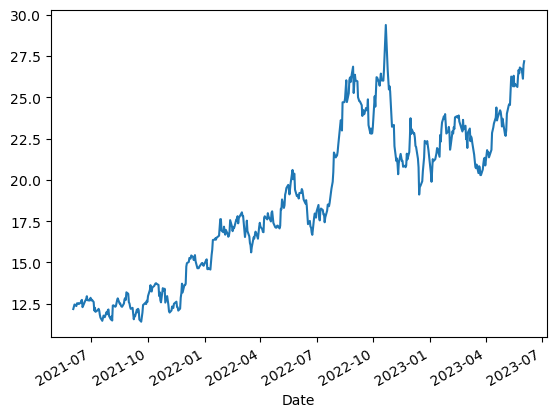

In [64]:
dados["Close"].plot()

## Tratamento de dados

In [65]:
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-02 00:00:00-03:00,11.951576,12.266206,11.912247,12.178809,103985100,0.0,0.0
2021-06-04 00:00:00-03:00,12.261837,12.506550,12.200659,12.454111,102757300,0.0,0.0
2021-06-07 00:00:00-03:00,12.454110,12.475959,12.239986,12.362343,74548900,0.0,0.0
2021-06-08 00:00:00-03:00,12.309904,12.585205,12.218136,12.524027,88398600,0.0,0.0
2021-06-09 00:00:00-03:00,12.550246,12.707561,12.462849,12.524027,60724200,0.0,0.0


In [66]:
treinamento = dados.reset_index()                                  # Date deixa de ser o índice
treinamento = treinamento[["Date", "Close"]]                       # Seleciona 2 colunas da tabela
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)     # Formatação da data
treinamento.columns = ['ds', 'y']                                  # Renomear as colunas
treinamento

,ds,y
0,2021-06-02,12.178809
1,2021-06-04,12.454111
2,2021-06-07,12.362343
3,2021-06-08,12.524027
4,2021-06-09,12.524027
...,...,...
495,2023-05-29,26.690001
496,2023-05-30,26.389999
497,2023-05-31,26.120001
498,2023-06-01,26.959999


## Treinando o modelo de Marchine Learning

In [20]:
!pip install prophet

In [ ]:
!pip uninstall cmdstanpy

In [71]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [ ]:
# Criar o modelo
modelo = Prophet()

In [69]:
# Treinar modelo
modelo.fit(treinamento)

11:16:38 - cmdstanpy - INFO - Chain [1] start processing
11:16:38 - cmdstanpy - INFO - Chain [1] done processing
11:16:38 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
11:16:38 - cmdstanpy - INFO - Chain [1] start processing
11:16:38 - cmdstanpy - INFO - Chain [1] done processing
11:16:38 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'D:\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=56467 data file=C:\Users\leandro\AppData\Local\Temp\tmphj65vk9j\5g709u0l.json init=C:\Users\leandro\AppData\Local\Temp\tmphj65vk9j\7xmct8w8.json output file=C:\Users\leandro\AppData\Local\Temp\tmphj65vk9j\prophet_modelhwssrep2\prophet_model-20230604111638.csv method=optimize algorithm=newton iter=10000' failed: 

## Realizar previsões

In [50]:
periodo = modelo.make_future_dataframe(90)

In [51]:
periodo.tail(20)

,ds
570,2023-08-12
571,2023-08-13
572,2023-08-14
573,2023-08-15
574,2023-08-16
575,2023-08-17
576,2023-08-18
577,2023-08-19
578,2023-08-20
579,2023-08-21


In [52]:
previsoes = modelo.predict(periodo)

KeyError: 'k'

In [53]:
plot_plotly(modelo, previsoes)

NameError: name 'previsoes' is not defined